<a href="https://colab.research.google.com/github/ichikankn/Big-data/blob/main/big_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas scikit-learn matplotlib


In [ ]:
import pandas as pd

# Membaca dataset dari file CSV
df = pd.read_csv('/content/drive/MyDrive/Big data uas/dataset_artikel_berita.csv')
print(df.head())


       Judul                           Teks
0  Artikel 1    Ekonomi sedang tumbuh pesat
1  Artikel 2         Politik global memanas
2  Artikel 3         Teknologi baru dirilis
3  Artikel 4       Olahraga menjadi populer
4  Artikel 5  Kesehatan penting untuk semua


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Konversi teks artikel menjadi representasi TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Teks'])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


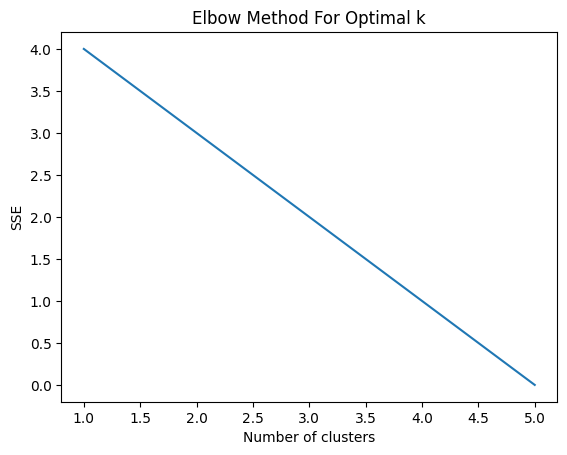

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Membaca dataset dari file CSV
df = pd.read_csv('/content/drive/MyDrive/Big data uas/dataset_artikel_berita.csv')

# Konversi teks artikel menjadi representasi TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Teks'])

# Menentukan jumlah kluster dengan metode elbow
# Ubah range_n_clusters menjadi maksimum jumlah sampel di dataset
sse = []
range_n_clusters = range(1, df.shape[0] + 1)  # Jumlah kluster maksimum adalah jumlah sampel
for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

plt.plot(range_n_clusters, sse)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
# Menggunakan 5 kluster (dari plot silhouette, misalnya)
kmeans = KMeans(n_clusters=5, random_state=0)
df['Kluster'] = kmeans.fit_predict(X)

print(df)


       Judul                           Teks  Kluster
0  Artikel 1    Ekonomi sedang tumbuh pesat        3
1  Artikel 2         Politik global memanas        4
2  Artikel 3         Teknologi baru dirilis        1
3  Artikel 4       Olahraga menjadi populer        2
4  Artikel 5  Kesehatan penting untuk semua        0


In [ ]:
# Menampilkan artikel dalam setiap kluster
for cluster in range(5):
    print(f"Kluster {cluster}:")
    print(df[df['Kluster'] == cluster][['Judul', 'Teks']])
    print()


Kluster 0:
       Judul                           Teks
4  Artikel 5  Kesehatan penting untuk semua

Kluster 1:
       Judul                    Teks
2  Artikel 3  Teknologi baru dirilis

Kluster 2:
       Judul                      Teks
3  Artikel 4  Olahraga menjadi populer

Kluster 3:
       Judul                         Teks
0  Artikel 1  Ekonomi sedang tumbuh pesat

Kluster 4:
       Judul                    Teks
1  Artikel 2  Politik global memanas



In [ ]:
df.to_csv('/content/drive/MyDrive/Big data uas/dataset_artikel_berita.csv', index=False)